# Income Prediction Problem

In this Notebook, I am working through the Income Prediction problem associated with the Adult Income Census dataset. The goal is to accurately predict whether or not someone is making more or less than $50,000 a year. While working through this problem, a typical framework is used to attack all the machine learning problems. It includes the following steps:
1. Load Libraries
2. Load Data
3. Analyze Data
4. Feature Engineering
5. Modeling
6. Algorithm Tuning
7. Finalizing the Model

## 1. Load Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

sns.set(style='white', context='notebook', palette='deep')

## 2. Load Data 

In [2]:
dataset = pd.read_csv('adult_data.csv', index_col=False, delimiter=", ", engine='python')
print(dataset.shape)

# Check for Null Data
dataset.isnull().sum()

(32561, 15)


age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [3]:
# Get data types
dataset.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [4]:
# Peek at data
dataset.head(30)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [5]:
# Reformat Column We Are Predicting
dataset['income']=dataset['income'].map({'<=50K': 0, '>50K': 1})
dataset.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1


In [6]:
# Check for '?' Data
dataset.isin(['?']).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [7]:
# Replace empty values marked as '?'
dataset['workclass'] = dataset['workclass'].replace('?',np.nan)
dataset['occupation'] = dataset['occupation'].replace('?',np.nan)
dataset['native-country'] = dataset['native-country'].replace('?',np.nan)

In [8]:
dataset.groupby(dataset['workclass'].isnull())['income'].mean()

workclass
False    0.248983
True     0.104031
Name: income, dtype: float64

In [9]:
dataset.groupby(dataset['occupation'].isnull())['income'].mean()

occupation
False    0.249040
True     0.103635
Name: income, dtype: float64

In [10]:
dataset.groupby(dataset['native-country'].isnull())['income'].mean()

native-country
False    0.240634
True     0.250429
Name: income, dtype: float64

In [11]:
# Convert Sex values to 0 and 1
dataset["sex"] = dataset["sex"].map({"Male": 0, "Female":1})

In [12]:
# Outlier detection 

def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# detect outliers from Age, Education Num , Capital Gain, Capital Loss and Hours Per Week
Outliers_to_drop = detect_outliers(dataset,2,["age","education-num","capital-gain","capital-loss","hours-per-week"])

In [13]:
dataset.loc[Outliers_to_drop] # Show the outliers rows

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
2754,80,Self-emp-not-inc,184335,7th-8th,4,Married-civ-spouse,Farming-fishing,Husband,White,0,0,0,30,United-States,0
2906,81,Private,114670,9th,5,Widowed,Priv-house-serv,Not-in-family,Black,1,2062,0,5,United-States,0
3211,82,NaN,29441,7th-8th,4,Widowed,NaN,Not-in-family,White,0,0,0,5,United-States,0
3777,80,Private,87518,Some-college,10,Never-married,Prof-specialty,Not-in-family,White,0,0,1816,60,United-States,0
4109,90,NaN,256514,Bachelors,13,Widowed,NaN,Other-relative,White,1,991,0,10,United-States,0
5370,90,Local-gov,227796,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,0,20051,0,60,United-States,1
6439,80,Private,249983,7th-8th,4,Widowed,Other-service,Not-in-family,White,1,0,0,24,United-States,0
8431,82,Private,152148,7th-8th,4,Married-civ-spouse,Handlers-cleaners,Husband,White,0,0,0,2,United-States,0
8694,80,NaN,29020,Prof-school,15,Married-civ-spouse,NaN,Husband,White,0,10605,0,10,United-States,1
8806,90,Private,87372,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,0,20051,0,72,United-States,1


In [14]:
# Drop outliers
dataset = dataset.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

## 3. Analyze Data

In [15]:
# Identify Numeric features
numeric_features = [cname for cname in dataset.columns if dataset[cname].dtype != "object"]

# Identify Categorical features
cat_features = [cname for cname in dataset.columns if dataset[cname].dtype == "object"]

In [16]:
# Peek at features
print("Numerical features: "+str(numeric_features))
print("Categorical features: "+str(cat_features))

Numerical features: ['age', 'fnlwgt', 'education-num', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'income']
Categorical features: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'native-country']


### 3.1. Numeric Data Analysis

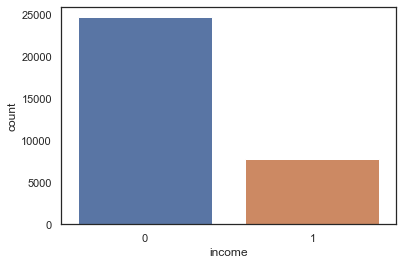

In [17]:
# Count of >50K & <=50K
sns.countplot(dataset['income'],label="Count")

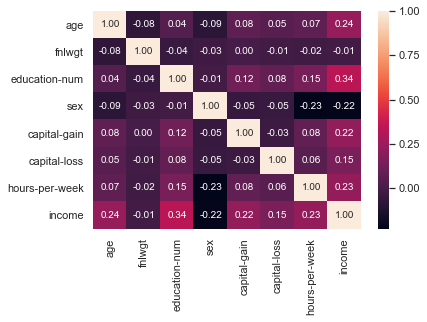

In [18]:
# Correlation matrix between numerical values
g = sns.heatmap(dataset[numeric_features].corr(), annot=True, fmt = ".2f")

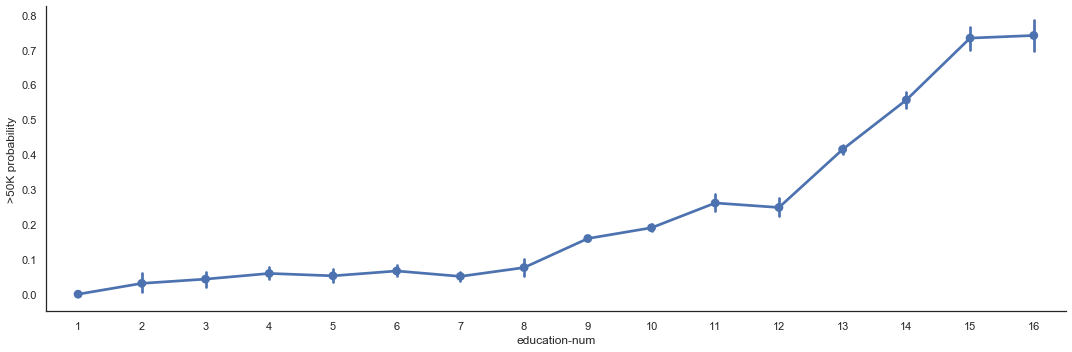

In [19]:
# Explore Relationships
# Explore Education Num vs Income
g = sns.catplot(x="education-num",y="income",data=dataset,kind="point",aspect=3)
g = g.set_ylabels(">50K probability")

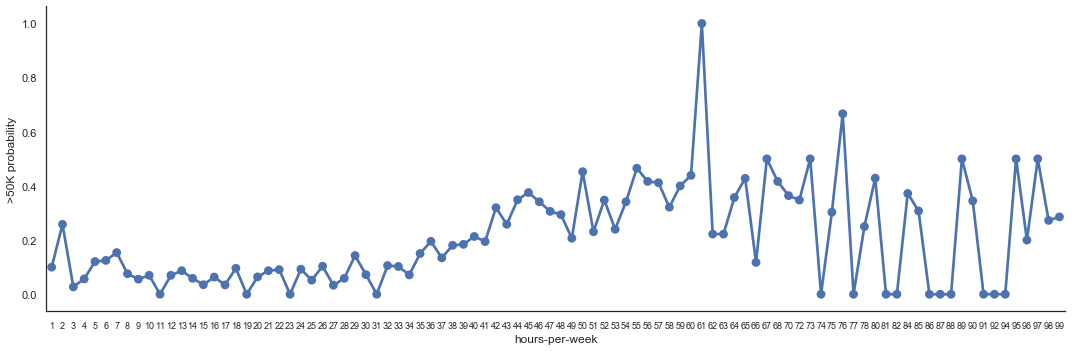

In [20]:
# Explore Hours Per Week vs Income
g  = sns.catplot(x="hours-per-week",y="income",data=dataset,kind="point",ci=None,aspect = 3)
g.set_xticklabels(fontsize=9)
g = g.set_ylabels(">50K probability")

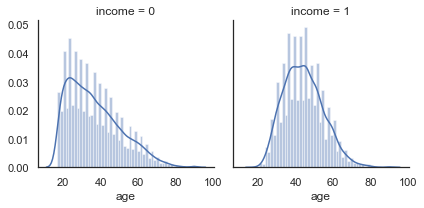

In [21]:
# Explore Age vs Income
g = sns.FacetGrid(dataset, col='income')
g = g.map(sns.distplot, "age")

### 3.2. Categorical Data Analysis 

[Text(0, 0, 'White'),
 Text(0, 0, 'Black'),
 Text(0, 0, 'Asian-Pac-Islander'),
 Text(0, 0, 'Amer-Indian-Eskimo'),
 Text(0, 0, 'Other')]

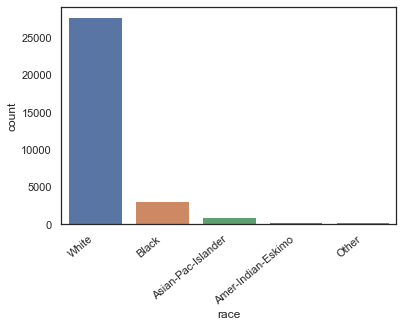

In [22]:
# Explore Race Distribution
g = sns.countplot(dataset["race"],label="count")
g.set_xticklabels(g.get_xticklabels(),rotation=40, ha="right")

[Text(0, 0, 'United-States'),
 Text(0, 0, 'Cuba'),
 Text(0, 0, 'Jamaica'),
 Text(0, 0, 'India'),
 Text(0, 0, 'Mexico'),
 Text(0, 0, 'South'),
 Text(0, 0, 'Puerto-Rico'),
 Text(0, 0, 'Honduras'),
 Text(0, 0, 'England'),
 Text(0, 0, 'Canada'),
 Text(0, 0, 'Germany'),
 Text(0, 0, 'Iran'),
 Text(0, 0, 'Philippines'),
 Text(0, 0, 'Italy'),
 Text(0, 0, 'Poland'),
 Text(0, 0, 'Columbia'),
 Text(0, 0, 'Cambodia'),
 Text(0, 0, 'Thailand'),
 Text(0, 0, 'Ecuador'),
 Text(0, 0, 'Laos'),
 Text(0, 0, 'Taiwan'),
 Text(0, 0, 'Haiti'),
 Text(0, 0, 'Portugal'),
 Text(0, 0, 'Dominican-Republic'),
 Text(0, 0, 'El-Salvador'),
 Text(0, 0, 'France'),
 Text(0, 0, 'Guatemala'),
 Text(0, 0, 'China'),
 Text(0, 0, 'Japan'),
 Text(0, 0, 'Yugoslavia'),
 Text(0, 0, 'Peru'),
 Text(0, 0, 'Outlying-US(Guam-USVI-etc)'),
 Text(0, 0, 'Scotland'),
 Text(0, 0, 'Trinadad&Tobago'),
 Text(0, 0, 'Greece'),
 Text(0, 0, 'Nicaragua'),
 Text(0, 0, 'Vietnam'),
 Text(0, 0, 'Hong'),
 Text(0, 0, 'Ireland'),
 Text(0, 0, 'Hungary'),
 Tex

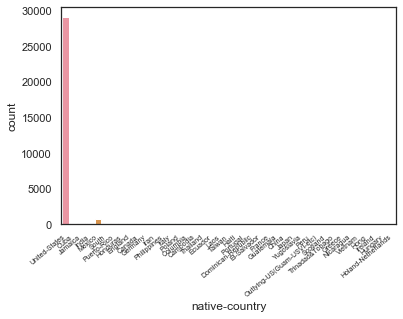

In [23]:
# Explore Native Country Distribution
g = sns.countplot(dataset["native-country"],label="count")
g.set_xticklabels(g.get_xticklabels(),rotation=40, ha="right", fontsize=7)

[Text(0, 0, 'State-gov'),
 Text(0, 0, 'Self-emp-not-inc'),
 Text(0, 0, 'Private'),
 Text(0, 0, 'Federal-gov'),
 Text(0, 0, 'Local-gov'),
 Text(0, 0, 'Self-emp-inc'),
 Text(0, 0, 'Without-pay'),
 Text(0, 0, 'Never-worked')]

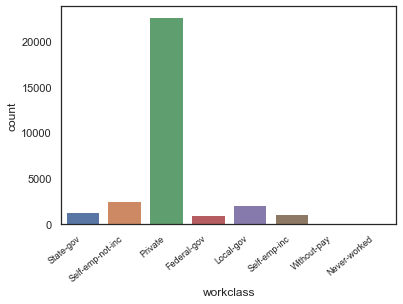

In [24]:
# Explore Workclass Distribution
g = sns.countplot(dataset["workclass"],label="count")
g.set_xticklabels(g.get_xticklabels(),rotation=40, ha="right", fontsize=9)

[Text(0, 0, 'Adm-clerical'),
 Text(0, 0, 'Exec-managerial'),
 Text(0, 0, 'Handlers-cleaners'),
 Text(0, 0, 'Prof-specialty'),
 Text(0, 0, 'Other-service'),
 Text(0, 0, 'Sales'),
 Text(0, 0, 'Craft-repair'),
 Text(0, 0, 'Transport-moving'),
 Text(0, 0, 'Farming-fishing'),
 Text(0, 0, 'Machine-op-inspct'),
 Text(0, 0, 'Tech-support'),
 Text(0, 0, 'Protective-serv'),
 Text(0, 0, 'Armed-Forces'),
 Text(0, 0, 'Priv-house-serv')]

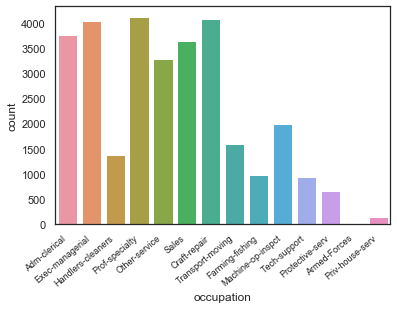

In [25]:
# Explore Occupation Distribution
g = sns.countplot(dataset["occupation"],label="count")
g.set_xticklabels(g.get_xticklabels(),rotation=40, ha="right", fontsize=9)

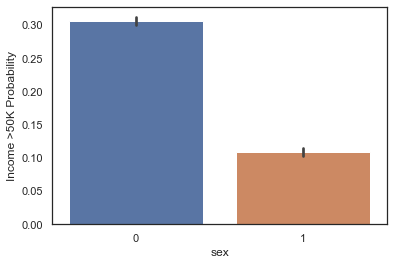

In [26]:
# Explore Relationships
# Explore Sex vs Income
g = sns.barplot(x="sex",y="income",data=dataset)
g = g.set_ylabel("Income >50K Probability")

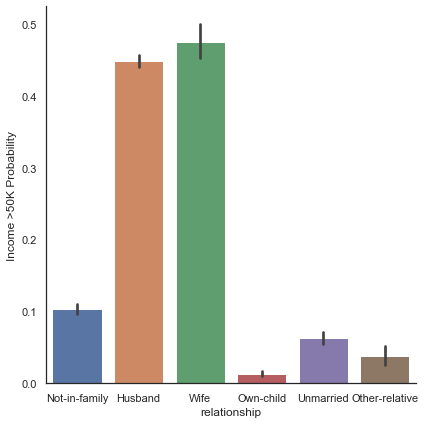

In [27]:
# Explore Relationship vs Income
g = sns.catplot(x="relationship",y="income",data=dataset,kind="bar",height=6)
g = g.set_ylabels("Income >50K Probability")

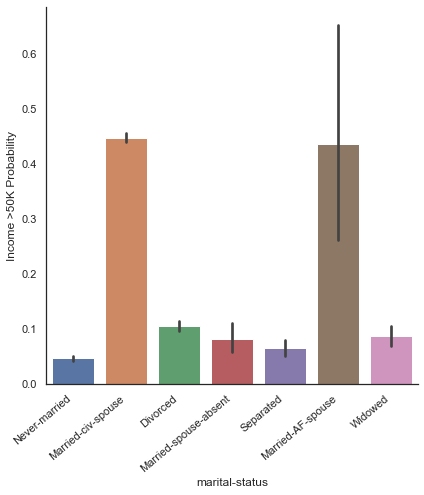

In [28]:
# Explore Marital Status vs Income
g = sns.catplot(x="marital-status",y="income",data=dataset,kind="bar",height=6)
g.set_xticklabels(rotation=40, ha="right")
g = g.set_ylabels("Income >50K Probability")

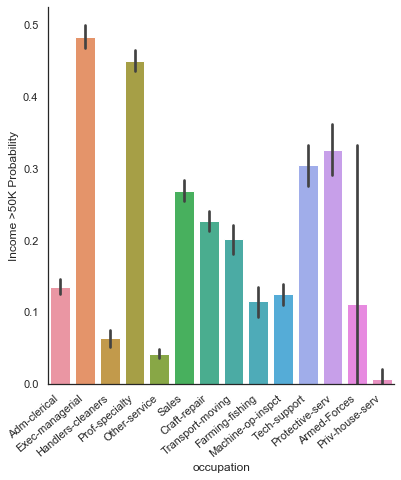

In [29]:
# Explore Occupation vs Income
g = sns.catplot(x="occupation",y="income",data=dataset,kind="bar",height=6)
g.set_xticklabels(rotation=40, ha="right")
g = g.set_ylabels("Income >50K Probability")

## 4. Feature Engineering

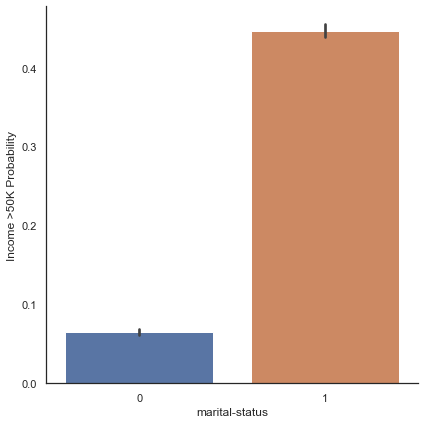

In [30]:
# Create Married Column - Binary Yes(1) or No(0)
dataset["marital-status"] = dataset["marital-status"].replace(['Never-married','Divorced','Separated','Widowed','Married-spouse-absent'], 'Single')
dataset["marital-status"] = dataset["marital-status"].replace(['Married-civ-spouse','Married-AF-spouse'], 'Married')
dataset["marital-status"] = dataset["marital-status"].map({"Married":1, "Single":0})

# Explore Marital Status vs Income again
g = sns.catplot(x="marital-status",y="income",data=dataset,kind="bar",height=6)
g = g.set_ylabels("Income >50K Probability")

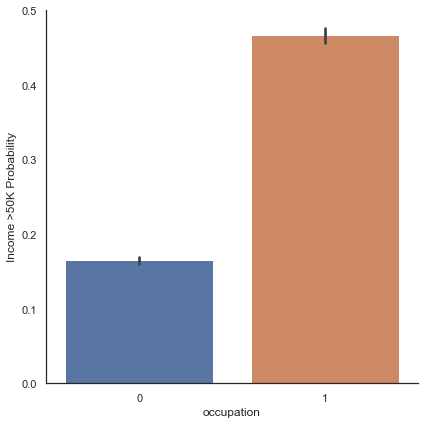

In [31]:
# Unifyiing similar occupations - Binary Yes(1) or No(0)
similar_occupation={'Exec-managerial':1,'Prof-specialty':1}

dataset['occupation']=dataset['occupation'].apply(lambda x: similar_occupation[x] if x in similar_occupation else 0)

# Explore Occupation vs Income again
g = sns.catplot(x="occupation",y="income",data=dataset,kind="bar",height=6)
g = g.set_ylabels("Income >50K Probability")

In [32]:
# Drop the data you don't want to use
dataset.drop(labels=["fnlwgt","workclass","education","relationship","race","native-country"], axis = 1, inplace = True)
print('Dataset with Dropped Labels')
print(dataset.head())

Dataset with Dropped Labels
   age  education-num  marital-status  occupation  sex  capital-gain  \
0   39             13               0           0    0          2174   
1   50             13               1           1    0             0   
2   38              9               0           0    0             0   
3   53              7               1           0    0             0   
4   28             13               1           1    1             0   

   capital-loss  hours-per-week  income  
0             0              40       0  
1             0              13       0  
2             0              40       0  
3             0              40       0  
4             0              40       0  


## 5. Modeling

In [33]:
# Seperate Test Set
testset=dataset.loc[dataset.shape[0]*0.8:]
dataset=dataset.loc[:dataset.shape[0]*0.8]

In [34]:
# Split-out Validation Dataset and Create Test Variables
X = dataset.drop(labels=["income"], axis = 1)
Y = dataset["income"]
validation_size = 0.25
seed = 77
scoring = 'precision'
X_train, X_validation, Y_train, Y_validation = train_test_split(X,Y,
    test_size=validation_size,random_state=seed,stratify=Y)

# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10, random_state=seed)

# Spot Check 8 Algorithms
models = []
models.append(('LR',LogisticRegression()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('MLP',MLPClassifier(random_state=seed)))
models.append(('DT',DecisionTreeClassifier(random_state=seed)))
models.append(('ADA',AdaBoostClassifier(DecisionTreeClassifier(random_state=seed),random_state=seed)))
models.append(('RF',RandomForestClassifier(random_state=seed)))
models.append(('GB',GradientBoostingClassifier(random_state=seed)))
models.append(('XGB',XGBClassifier()))

# Evalutate each model in turn
results = []
names = []
print("Results(Precision):")#F-measure
for name, model in models:
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring, n_jobs=-1)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f" % (name, cv_results.mean())
    print(msg)

Results(Precision):
LR: 0.738200
KNN: 0.701151
MLP: 0.719462
DT: 0.668808
ADA: 0.681820
RF: 0.688159
GB: 0.785019
XGB: 0.795679


## 6. Algorithm Tuning

In [35]:
# Logistic Regression Parameters tunning 
LRclr = LogisticRegression()


## Search grid for optimal parameters
LRclr_param_grid = {'C':[0.001,0.01,0.1,1,10,100,1000]}

gsLRclr=GridSearchCV(LRclr,param_grid = LRclr_param_grid, cv=kfold, scoring=scoring, n_jobs= -1, verbose = 1)



gsLRclr.fit(X_train,Y_train)

LRclr_best = gsLRclr.best_estimator_

# Best score
gsLRclr.best_score_, gsLRclr.best_params_

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    4.8s finished
C:\Users\david\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(0.7816556559303925, {'C': 0.001})

In [36]:
# KNN Parameters tunning 
KNNclr = KNeighborsClassifier()


## Search grid for optimal parameters
KNNclr_param_grid = {'n_neighbors':np.arange(1,20)}
                   

    
gsKNNclr=GridSearchCV(KNNclr,param_grid = KNNclr_param_grid, cv=kfold, scoring=scoring, n_jobs= -1, verbose = 1)


gsKNNclr.fit(X_train,Y_train)

KNNclr_best = gsKNNclr.best_estimator_

# Best score
gsKNNclr.best_score_, gsKNNclr.best_params_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 10 folds for each of 19 candidates, totalling 190 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 190 out of 190 | elapsed:   17.9s finished


(0.7657019604713086, {'n_neighbors': 14})

In [37]:
# Multi-layer Perceptron Parameters tunning 
MLPclr = MLPClassifier(random_state=seed)


## Search grid for optimal parameters
MLPclr_param_grid = {'hidden_layer_sizes':[(5,),(50,),(250,),(500,)],
                    'activation': ['relu','tanh','logistic'],
                    'learning_rate':['constant','invscaling','adaptive']}

gsMLPclr=GridSearchCV(MLPclr,param_grid = MLPclr_param_grid, cv=kfold, scoring=scoring, n_jobs= -1, verbose = 1)



gsMLPclr.fit(X_train,Y_train)

MLPclr_best = gsMLPclr.best_estimator_

# Best score
gsMLPclr.best_score_, gsMLPclr.best_params_

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   28.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed: 16.6min finished
C:\Users\david\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


(0.7488735704429142,
 {'activation': 'relu',
  'hidden_layer_sizes': (250,),
  'learning_rate': 'constant'})

In [38]:
# Adaboost Parameters tunning
DTC = DecisionTreeClassifier(max_depth=1, random_state=seed)

adaDTC = AdaBoostClassifier(DTC, random_state=seed)

ada_param_grid = {
              "n_estimators" :[50,250,500],
              "learning_rate":  [0.001, 0.01, 0.1, 1]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring=scoring, n_jobs= -1, verbose = 1)

gsadaDTC.fit(X_train,Y_train)

ada_best = gsadaDTC.best_estimator_

# Best score
gsadaDTC.best_score_, gsadaDTC.best_params_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   56.4s finished


(0.9836520503625618, {'learning_rate': 0.001, 'n_estimators': 500})

In [39]:
# Random Forest Parameters tunning 
RFC = RandomForestClassifier(random_state=seed)


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [2, 4, 8, 16, 32, None],
              "n_estimators" :[5, 50, 250]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring=scoring, n_jobs= -1, verbose = 1)

gsRFC.fit(X_train,Y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_, gsRFC.best_params_

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 165 out of 180 | elapsed:   21.6s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   28.6s finished


(0.9824710862999669, {'max_depth': 2, 'n_estimators': 5})

In [40]:
# Gradient Boosting Parameters tunning

GBC = GradientBoostingClassifier(random_state = seed)
gb_param_grid = {'n_estimators' : [5,50,250,500],
                 'learning_rate': [0.01,0.1,1],
                 'max_depth': [1, 3, 5, 7]
                }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring=scoring, n_jobs= -1, verbose = 1)

gsGBC.fit(X_train,Y_train)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_,gsGBC.best_params_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 203 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 453 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  4.9min finished


(0.9901979488823354,
 {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50})

In [41]:
# XGB Parameters tunning 
xgb = XGBClassifier()



## Search grid for optimal parameters
xgb_param_grid ={  
    "n_estimators": [5,50,250,500],
    'max_depth':[1, 3, 5, 7],
    "learning_rate": [0.01,0.05,0.1]
}


gsxgb=GridSearchCV(xgb,param_grid = xgb_param_grid, cv=kfold, scoring=scoring, n_jobs= -1, verbose = 1)

gsxgb.fit(X_train,Y_train)

xgb_best = gsxgb.best_estimator_

# Best score
gsxgb.best_score_,gsxgb.best_params_

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 209 tasks      | elapsed:   43.3s
[Parallel(n_jobs=-1)]: Done 459 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  2.0min finished


(0.983260124716829,
 {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50})

<module 'matplotlib.pyplot' from 'C:\\Users\\david\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

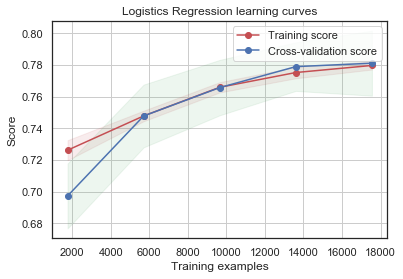

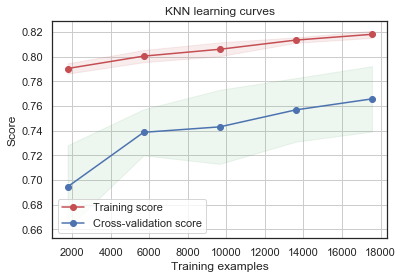

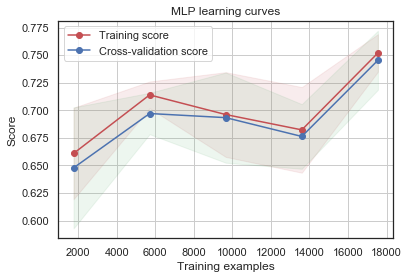

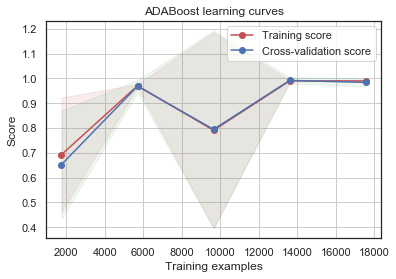

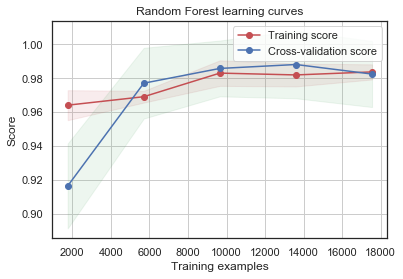

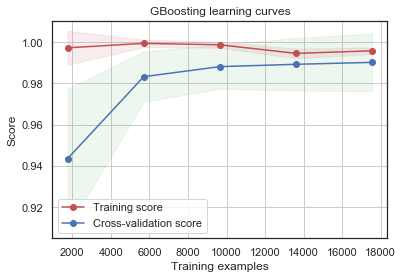

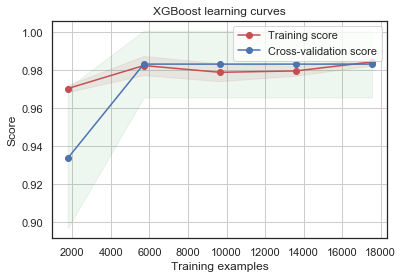

In [42]:
# Learning Curve(Fitting Analysis)
def plot_learning_curve(estimator, title, X, y, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)

    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring=scoring)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt




plot_learning_curve(gsLRclr.best_estimator_,"Logistics Regression learning curves",X_train,Y_train,cv=kfold)
plot_learning_curve(gsKNNclr.best_estimator_,"KNN learning curves",X_train,Y_train,cv=kfold)
plot_learning_curve(gsMLPclr.best_estimator_,"MLP learning curves",X_train,Y_train,cv=kfold)
plot_learning_curve(gsadaDTC.best_estimator_,"ADABoost learning curves",X_train,Y_train,cv=kfold)
plot_learning_curve(gsRFC.best_estimator_,"Random Forest learning curves",X_train,Y_train,cv=kfold)
plot_learning_curve(gsGBC.best_estimator_,"GBoosting learning curves",X_train,Y_train,cv=kfold)
plot_learning_curve(gsxgb.best_estimator_,"XGBoost learning curves",X_train,Y_train,cv=kfold)

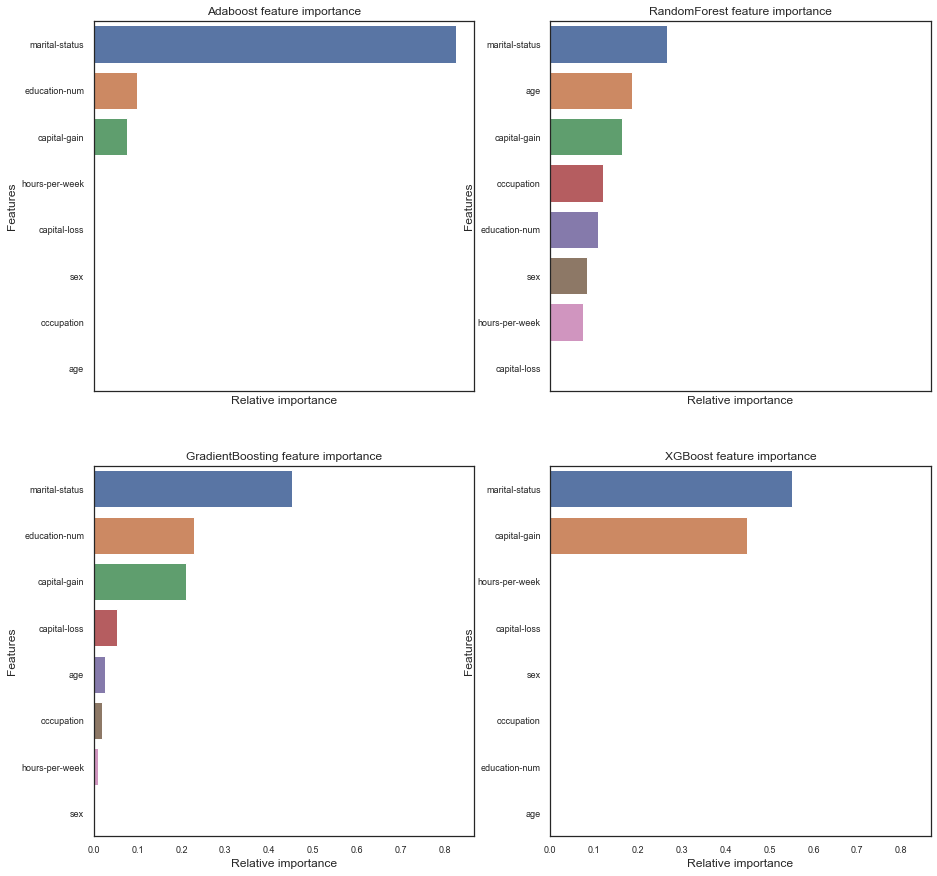

In [43]:
nrows = ncols = 2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(15,15))

names_classifiers = [("Adaboost",ada_best),("RandomForest",RFC_best),("GradientBoosting",GBC_best),("XGBoost",xgb_best)]

nclassifier = 0
for row in range(nrows):
    for col in range(ncols):
        name = names_classifiers[nclassifier][0]
        classifier = names_classifiers[nclassifier][1]
        indices = np.argsort(classifier.feature_importances_)[::-1][:]
        g = sns.barplot(y=X_train.columns[indices][:],x = classifier.feature_importances_[indices][:] , orient='h',ax=axes[row][col])
        g.set_xlabel("Relative importance",fontsize=12)
        g.set_ylabel("Features",fontsize=12)
        g.tick_params(labelsize=9)
        g.set_title(name + " feature importance")
        nclassifier += 1     

## 7. Finalize Model

In [44]:
# Predictions on validation dataset - Adaboost

ada_best.fit(X_train, Y_train)
predictions = ada_best.predict(X_validation)
print("Accuracy: %s%%" % (100*accuracy_score(Y_validation, predictions)))
print("Confusion Matrix:")
print(confusion_matrix(Y_validation, predictions))
print("Classification Report:")
print(classification_report(Y_validation, predictions))

Accuracy: 78.237465395263%
Confusion Matrix:
[[4944    0]
 [1415  143]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      1.00      0.87      4944
           1       1.00      0.09      0.17      1558

    accuracy                           0.78      6502
   macro avg       0.89      0.55      0.52      6502
weighted avg       0.83      0.78      0.71      6502



In [45]:
# Predictions on validation dataset - Random Forest

RFC_best.fit(X_train, Y_train)
predictions = RFC_best.predict(X_validation)
print("Accuracy: %s%%" % (100*accuracy_score(Y_validation, predictions)))
print("Confusion Matrix:")
print(confusion_matrix(Y_validation, predictions))
print("Classification Report:")
print(classification_report(Y_validation, predictions))

Accuracy: 78.66810212242386%
Confusion Matrix:
[[4941    3]
 [1384  174]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4944
           1       0.98      0.11      0.20      1558

    accuracy                           0.79      6502
   macro avg       0.88      0.56      0.54      6502
weighted avg       0.83      0.79      0.71      6502



In [46]:
# Predictions on validation dataset - GradientBoost

GBC_best.fit(X_train, Y_train)
predictions = GBC_best.predict(X_validation)
print("Accuracy: %s%%" % (100*accuracy_score(Y_validation, predictions)))
print("Confusion Matrix:")
print(confusion_matrix(Y_validation, predictions))
print("Classification Report:")
print(classification_report(Y_validation, predictions))

Accuracy: 81.46724084896955%
Confusion Matrix:
[[4937    7]
 [1198  360]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      4944
           1       0.98      0.23      0.37      1558

    accuracy                           0.81      6502
   macro avg       0.89      0.61      0.63      6502
weighted avg       0.85      0.81      0.77      6502



In [47]:
# Predictions on validation dataset - XGBoost

xgb_best.fit(X_train, Y_train)
predictions = xgb_best.predict(X_validation)
print("Accuracy: %s%%" % (100*accuracy_score(Y_validation, predictions)))
print("Confusion Matrix:")
print(confusion_matrix(Y_validation, predictions))
print("Classification Report:")
print(classification_report(Y_validation, predictions))

Accuracy: 79.8215933558905%
Confusion Matrix:
[[4943    1]
 [1311  247]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      4944
           1       1.00      0.16      0.27      1558

    accuracy                           0.80      6502
   macro avg       0.89      0.58      0.58      6502
weighted avg       0.84      0.80      0.74      6502



In [48]:
# Final Model - Gradient Boosting
# Check Performance on Testset
# Predictions on testset - GradientBoost
X_test = testset.drop(labels=["income"], axis = 1)
Y_test = testset["income"]

GBC_best.fit(X_train, Y_train)
predictions = GBC_best.predict(X_test)
print("Accuracy: %s%%" % (100*accuracy_score(Y_test, predictions)))
print("Confusion Matrix:")
print(confusion_matrix(Y_test, predictions))
print("Classification Report:")
print(classification_report(Y_test, predictions))

Accuracy: 81.31056760498385%
Confusion Matrix:
[[4901    2]
 [1213  385]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      4903
           1       0.99      0.24      0.39      1598

    accuracy                           0.81      6501
   macro avg       0.90      0.62      0.64      6501
weighted avg       0.85      0.81      0.77      6501

